![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

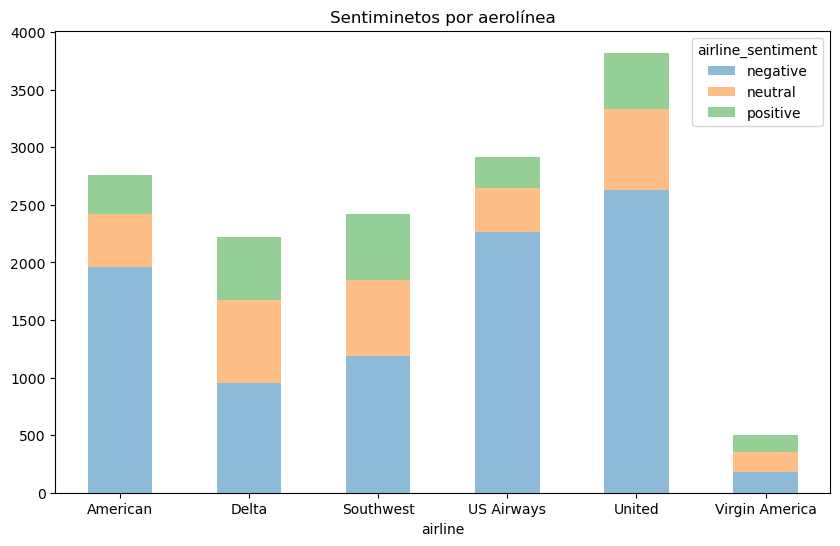

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")
plt.show()

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [12]:
# Celda 1
vect_A = CountVectorizer()
X_dtm_A = vect_A.fit_transform(X_train)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_dtm_A,y_train)

# prediccción y evaluación
X_dtm_1_test = vect_A.transform(X_test)
y_pred = clf.predict(X_dtm_1_test)

accuracy_RF_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo con CountVectorizer: {accuracy_RF_1:.4f}")

Accuracy del modelo con CountVectorizer: 0.7711


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [13]:
# Celda 2
vect_B = CountVectorizer(stop_words='english')
X_dtm_B = vect_B.fit_transform(X_train)

clf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

clf_2.fit(X_dtm_B,y_train)

#predicción y evaluación
X_dtm_2_test = vect_B.transform(X_test)
y_pred_2 = clf_2.predict(X_dtm_2_test)

accuracy_RF_2 = accuracy_score(y_test, y_pred_2)
accuracy_RF_2

print(f"Accuracy del modelo Random Forest (con stopwords removidas): {accuracy_RF_2:.4f}")

Accuracy del modelo Random Forest (con stopwords removidas): 0.7618


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk

# Descargar recursos de nltk si aún no están
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vhmen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vhmen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vhmen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vhmen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
# Celda 3
#Lematizador
wordnet_lemmatizer = WordNetLemmatizer()


# Función de lematización asumiendo verbos
def split_into_lemmas(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    return [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens]


vect_C = CountVectorizer(analyzer=split_into_lemmas)
X_dtm_C = vect_C.fit_transform(X_train)

clf_3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_3.fit(X_dtm_C,y_train)

#predicción y evaluación
X_dtm_3_test = vect_C.transform(X_test)
y_pred_3 = clf_3.predict(X_dtm_3_test)

accuracy_RF_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy del modelo Random Forest (con lematización de verbos): {accuracy_RF_3:.4f}")

Accuracy del modelo Random Forest (con lematización de verbos): 0.7740


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vhmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función de lematización + eliminación de stopwords
def split_lemmas_no_stopwords(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    lemmas = [wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens if token not in stop_words]
    return lemmas

In [18]:
# Celda 4
vect_D = CountVectorizer(analyzer=split_lemmas_no_stopwords)
X_dtm_D = vect_D.fit_transform(X_train)

clf_4 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_4.fit(X_dtm_D,y_train)


#predicción y evaluación
X_dtm_4_test = vect_D.transform(X_test)
y_pred_4 = clf_4.predict(X_dtm_4_test)

accuracy_RF_4 = accuracy_score(y_test, y_pred_4)
print(f"Accuracy del modelo Random Forest multiples técnicas: {accuracy_RF_4:.4f}")

Accuracy del modelo Random Forest multiples técnicas: 0.7831


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

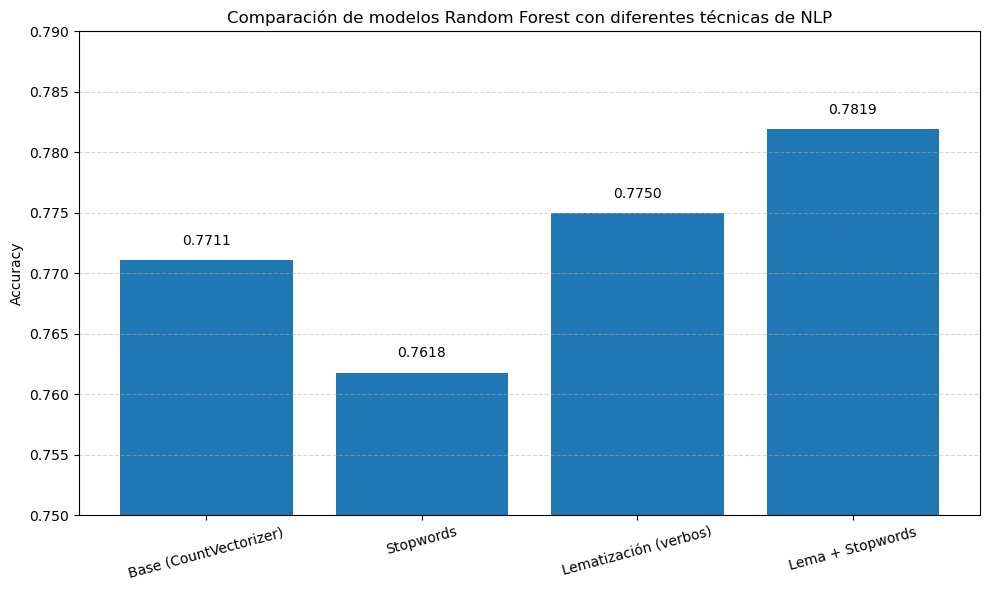

In [19]:
# Celda 5
import matplotlib.pyplot as plt

# Resultados de accuracy por modelo
modelos = [
    "Base (CountVectorizer)",
    "Stopwords",
    "Lematización (verbos)",
    "Lema + Stopwords"
]

accuracy = [0.7711, 0.7618, 0.7750, 0.7819]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, accuracy)
plt.ylim(0.75, 0.79)
plt.ylabel('Accuracy')
plt.title('Comparación de modelos Random Forest con diferentes técnicas de NLP')

# Mostrar los valores sobre las barras
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Mejor modelo: Lematización + Stopwords (Accuracy: 0.7819)**  
- **Ventajas:** Esta estrategia logra reducir el ruido del texto (eliminando palabras sin valor semántico) y al mismo tiempo unifica formas verbales similares a una única representación base. Esto permite que el modelo aprenda patrones más generales, mejorando su capacidad de clasificación.  
- **Resultado:** Mayor capacidad para capturar la estructura semántica real de los tweets.

**Peor modelo: Solo eliminación de stopwords (Accuracy: 0.7618)**  
- **Desventajas:** Aunque la eliminación de stopwords suele ser útil, en este caso eliminó palabras que aportaban información emocional (como "not", "never" o "very"), afectando negativamente la capacidad del modelo para distinguir entre sentimientos.  
- **Resultado:** Pérdida de información clave para la clasificación de sentimientos.


La combinación de múltiples técnicas de normalización mejora de forma notable el desempeño del modelo. En análisis de sentimientos, no siempre conviene eliminar todas las stopwords de forma indiscriminada, y es recomendable aplicar lematización para capturar mejor la semántica subyacente del lenguaje natural.